## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  81.598196  1600.032139  0.254664   6.620985  1.260867
1  92.035814  1695.135466  0.763768   8.554872  1.600617
2  96.193463   923.093957  0.172780   8.355380  1.024783
3  69.911382   497.194700  0.283042  10.550040  1.154365
4  77.879671   625.855406  0.408194   9.995472  1.310415


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.3967  | train_mse: 4.77355 | train_mae: 1.66176 |  0:00:00s
epoch 1  | loss: 0.97796 | train_mse: 2.83099 | train_mae: 1.31096 |  0:00:00s
epoch 2  | loss: 0.86861 | train_mse: 1.97844 | train_mae: 1.02319 |  0:00:00s


epoch 3  | loss: 0.7631  | train_mse: 1.70821 | train_mae: 0.96745 |  0:00:00s
epoch 4  | loss: 0.78899 | train_mse: 1.89142 | train_mae: 1.03991 |  0:00:00s
epoch 5  | loss: 0.85825 | train_mse: 1.80331 | train_mae: 1.0657  |  0:00:00s


epoch 6  | loss: 0.83958 | train_mse: 1.43771 | train_mae: 0.90825 |  0:00:00s


epoch 7  | loss: 0.86959 | train_mse: 1.19712 | train_mae: 0.76102 |  0:00:01s
epoch 8  | loss: 0.83543 | train_mse: 1.08476 | train_mae: 0.72406 |  0:00:01s
epoch 9  | loss: 0.69326 | train_mse: 1.32931 | train_mae: 0.81753 |  0:00:01s


epoch 10 | loss: 0.66777 | train_mse: 1.00106 | train_mae: 0.74567 |  0:00:01s
epoch 11 | loss: 0.53628 | train_mse: 1.0641  | train_mae: 0.76837 |  0:00:01s
epoch 12 | loss: 0.64073 | train_mse: 1.27984 | train_mae: 0.80585 |  0:00:01s


epoch 13 | loss: 0.52952 | train_mse: 0.8692  | train_mae: 0.69062 |  0:00:01s
epoch 14 | loss: 0.59473 | train_mse: 1.02051 | train_mae: 0.70381 |  0:00:01s
epoch 15 | loss: 0.64167 | train_mse: 1.2906  | train_mae: 0.81131 |  0:00:01s
epoch 16 | loss: 0.62005 | train_mse: 1.15533 | train_mae: 0.78333 |  0:00:01s


epoch 17 | loss: 0.7127  | train_mse: 0.91357 | train_mae: 0.69316 |  0:00:01s
epoch 18 | loss: 0.52419 | train_mse: 1.00351 | train_mae: 0.71824 |  0:00:01s
epoch 19 | loss: 0.63539 | train_mse: 1.21273 | train_mae: 0.76736 |  0:00:01s
epoch 20 | loss: 0.61368 | train_mse: 0.94025 | train_mae: 0.68012 |  0:00:01s


epoch 21 | loss: 0.63223 | train_mse: 0.61141 | train_mae: 0.57798 |  0:00:01s
epoch 22 | loss: 0.5023  | train_mse: 0.58403 | train_mae: 0.56475 |  0:00:02s
epoch 23 | loss: 0.42152 | train_mse: 0.61709 | train_mae: 0.56622 |  0:00:02s


epoch 24 | loss: 0.47807 | train_mse: 0.64073 | train_mae: 0.59328 |  0:00:02s
epoch 25 | loss: 0.5008  | train_mse: 0.48069 | train_mae: 0.4996  |  0:00:02s


epoch 26 | loss: 0.42635 | train_mse: 0.40476 | train_mae: 0.4514  |  0:00:02s
epoch 27 | loss: 0.41581 | train_mse: 0.40411 | train_mae: 0.45898 |  0:00:02s
epoch 28 | loss: 0.38298 | train_mse: 0.41073 | train_mae: 0.45497 |  0:00:02s
epoch 29 | loss: 0.41417 | train_mse: 0.46826 | train_mae: 0.48758 |  0:00:02s


epoch 30 | loss: 0.37839 | train_mse: 0.55951 | train_mae: 0.52638 |  0:00:02s
epoch 31 | loss: 0.31378 | train_mse: 0.38594 | train_mae: 0.41645 |  0:00:02s
epoch 32 | loss: 0.3541  | train_mse: 0.36524 | train_mae: 0.40307 |  0:00:02s
epoch 33 | loss: 0.44504 | train_mse: 0.35942 | train_mae: 0.38907 |  0:00:02s


epoch 34 | loss: 0.43935 | train_mse: 0.39254 | train_mae: 0.43414 |  0:00:02s
epoch 35 | loss: 0.35908 | train_mse: 0.41249 | train_mae: 0.45644 |  0:00:03s
epoch 36 | loss: 0.35197 | train_mse: 0.39822 | train_mae: 0.43966 |  0:00:03s
epoch 37 | loss: 0.42896 | train_mse: 0.40157 | train_mae: 0.44095 |  0:00:03s


epoch 38 | loss: 0.47337 | train_mse: 0.49222 | train_mae: 0.48742 |  0:00:03s
epoch 39 | loss: 0.57068 | train_mse: 0.54849 | train_mae: 0.50395 |  0:00:03s
epoch 40 | loss: 0.3882  | train_mse: 0.39932 | train_mae: 0.41405 |  0:00:03s


epoch 41 | loss: 0.35865 | train_mse: 0.35331 | train_mae: 0.39699 |  0:00:03s
epoch 42 | loss: 0.50746 | train_mse: 0.36288 | train_mae: 0.40669 |  0:00:03s
epoch 43 | loss: 0.45066 | train_mse: 0.35204 | train_mae: 0.39178 |  0:00:03s
epoch 44 | loss: 0.34032 | train_mse: 0.41095 | train_mae: 0.42973 |  0:00:03s


epoch 45 | loss: 0.61321 | train_mse: 0.43734 | train_mae: 0.44788 |  0:00:03s
epoch 46 | loss: 0.51292 | train_mse: 0.35614 | train_mae: 0.36081 |  0:00:03s
epoch 47 | loss: 0.33591 | train_mse: 0.33469 | train_mae: 0.34371 |  0:00:03s


epoch 48 | loss: 0.38821 | train_mse: 0.35477 | train_mae: 0.44563 |  0:00:03s
epoch 49 | loss: 0.31273 | train_mse: 0.32122 | train_mae: 0.43159 |  0:00:03s
epoch 50 | loss: 0.25455 | train_mse: 0.23691 | train_mae: 0.37234 |  0:00:04s
epoch 51 | loss: 0.25921 | train_mse: 0.20439 | train_mae: 0.3556  |  0:00:04s
epoch 52 | loss: 0.48777 | train_mse: 0.18231 | train_mae: 0.34922 |  0:00:04s


epoch 53 | loss: 0.24986 | train_mse: 0.31039 | train_mae: 0.41799 |  0:00:04s
epoch 54 | loss: 0.19326 | train_mse: 0.53214 | train_mae: 0.51384 |  0:00:04s
epoch 55 | loss: 0.2033  | train_mse: 0.54538 | train_mae: 0.51415 |  0:00:04s


epoch 56 | loss: 0.30585 | train_mse: 0.34397 | train_mae: 0.43169 |  0:00:04s
epoch 57 | loss: 0.3081  | train_mse: 0.1881  | train_mae: 0.34718 |  0:00:04s
epoch 58 | loss: 0.24574 | train_mse: 0.14698 | train_mae: 0.30471 |  0:00:04s


epoch 59 | loss: 0.15318 | train_mse: 0.17742 | train_mae: 0.32983 |  0:00:04s
epoch 60 | loss: 0.16537 | train_mse: 0.19722 | train_mae: 0.34423 |  0:00:04s
epoch 61 | loss: 0.42291 | train_mse: 0.17474 | train_mae: 0.33311 |  0:00:04s


epoch 62 | loss: 0.14539 | train_mse: 0.12269 | train_mae: 0.28815 |  0:00:04s
epoch 63 | loss: 0.42556 | train_mse: 0.11736 | train_mae: 0.29214 |  0:00:04s
epoch 64 | loss: 0.26612 | train_mse: 0.14651 | train_mae: 0.31832 |  0:00:05s


epoch 65 | loss: 0.13847 | train_mse: 0.13025 | train_mae: 0.29814 |  0:00:05s
epoch 66 | loss: 0.31205 | train_mse: 0.13135 | train_mae: 0.29346 |  0:00:05s
epoch 67 | loss: 0.25439 | train_mse: 0.22725 | train_mae: 0.36013 |  0:00:05s


epoch 68 | loss: 0.13936 | train_mse: 0.17059 | train_mae: 0.31806 |  0:00:05s
epoch 69 | loss: 0.18114 | train_mse: 0.09731 | train_mae: 0.25176 |  0:00:05s
epoch 70 | loss: 0.14995 | train_mse: 0.08925 | train_mae: 0.24305 |  0:00:05s


epoch 71 | loss: 0.24683 | train_mse: 0.1003  | train_mae: 0.25436 |  0:00:05s
epoch 72 | loss: 0.27704 | train_mse: 0.10001 | train_mae: 0.23732 |  0:00:05s
epoch 73 | loss: 0.13655 | train_mse: 0.0972  | train_mae: 0.24219 |  0:00:05s


epoch 74 | loss: 0.27683 | train_mse: 0.09265 | train_mae: 0.24295 |  0:00:05s
epoch 75 | loss: 0.271   | train_mse: 0.08992 | train_mae: 0.23367 |  0:00:05s
epoch 76 | loss: 0.17342 | train_mse: 0.1072  | train_mae: 0.25505 |  0:00:06s


epoch 77 | loss: 0.18391 | train_mse: 0.10994 | train_mae: 0.26275 |  0:00:06s
epoch 78 | loss: 0.1904  | train_mse: 0.15037 | train_mae: 0.29812 |  0:00:06s
epoch 79 | loss: 0.27739 | train_mse: 0.162   | train_mae: 0.31649 |  0:00:06s
epoch 80 | loss: 0.15173 | train_mse: 0.10928 | train_mae: 0.26961 |  0:00:06s


epoch 81 | loss: 0.14836 | train_mse: 0.08709 | train_mae: 0.23704 |  0:00:06s
epoch 82 | loss: 0.28545 | train_mse: 0.12209 | train_mae: 0.26527 |  0:00:06s
epoch 83 | loss: 0.1915  | train_mse: 0.13537 | train_mae: 0.27149 |  0:00:06s
epoch 84 | loss: 0.16259 | train_mse: 0.12597 | train_mae: 0.26726 |  0:00:06s


epoch 85 | loss: 0.13453 | train_mse: 0.09228 | train_mae: 0.2438  |  0:00:06s
epoch 86 | loss: 0.24518 | train_mse: 0.10359 | train_mae: 0.25381 |  0:00:06s
epoch 87 | loss: 0.18915 | train_mse: 0.09296 | train_mae: 0.24791 |  0:00:06s
epoch 88 | loss: 0.14657 | train_mse: 0.1589  | train_mae: 0.3035  |  0:00:06s


epoch 89 | loss: 0.2471  | train_mse: 0.17665 | train_mae: 0.31925 |  0:00:06s
epoch 90 | loss: 0.13005 | train_mse: 0.15285 | train_mae: 0.29364 |  0:00:06s
epoch 91 | loss: 0.15723 | train_mse: 0.10571 | train_mae: 0.25743 |  0:00:07s
epoch 92 | loss: 0.24275 | train_mse: 0.13205 | train_mae: 0.29618 |  0:00:07s


epoch 93 | loss: 0.15477 | train_mse: 0.19137 | train_mae: 0.33711 |  0:00:07s
epoch 94 | loss: 0.1337  | train_mse: 0.15027 | train_mae: 0.30234 |  0:00:07s
epoch 95 | loss: 0.12284 | train_mse: 0.11953 | train_mae: 0.26129 |  0:00:07s
epoch 96 | loss: 0.18775 | train_mse: 0.14829 | train_mae: 0.28999 |  0:00:07s


epoch 97 | loss: 0.15363 | train_mse: 0.1578  | train_mae: 0.30672 |  0:00:07s
epoch 98 | loss: 0.23076 | train_mse: 0.16803 | train_mae: 0.31119 |  0:00:07s
epoch 99 | loss: 0.14988 | train_mse: 0.14358 | train_mae: 0.29196 |  0:00:07s
epoch 100| loss: 0.35964 | train_mse: 0.11609 | train_mae: 0.26812 |  0:00:07s


epoch 101| loss: 0.29267 | train_mse: 0.18585 | train_mae: 0.32087 |  0:00:07s
epoch 102| loss: 0.18669 | train_mse: 0.25133 | train_mae: 0.36231 |  0:00:07s
epoch 103| loss: 0.21373 | train_mse: 0.22437 | train_mae: 0.34715 |  0:00:07s
epoch 104| loss: 0.18006 | train_mse: 0.19368 | train_mae: 0.33306 |  0:00:07s


epoch 105| loss: 0.19661 | train_mse: 0.15863 | train_mae: 0.3105  |  0:00:07s
epoch 106| loss: 0.18151 | train_mse: 0.20855 | train_mae: 0.35312 |  0:00:07s
epoch 107| loss: 0.50122 | train_mse: 0.25354 | train_mae: 0.37741 |  0:00:08s
epoch 108| loss: 0.26237 | train_mse: 0.24848 | train_mae: 0.37337 |  0:00:08s


epoch 109| loss: 0.19782 | train_mse: 0.15062 | train_mae: 0.30296 |  0:00:08s
epoch 110| loss: 0.1913  | train_mse: 0.12076 | train_mae: 0.27449 |  0:00:08s
epoch 111| loss: 0.26524 | train_mse: 0.10959 | train_mae: 0.26853 |  0:00:08s


epoch 112| loss: 0.1049  | train_mse: 0.10115 | train_mae: 0.26292 |  0:00:08s
epoch 113| loss: 0.15863 | train_mse: 0.14242 | train_mae: 0.30905 |  0:00:08s
epoch 114| loss: 0.1566  | train_mse: 0.18289 | train_mae: 0.33238 |  0:00:08s
epoch 115| loss: 0.14491 | train_mse: 0.12217 | train_mae: 0.26969 |  0:00:08s


epoch 116| loss: 0.14757 | train_mse: 0.10595 | train_mae: 0.25393 |  0:00:08s
epoch 117| loss: 0.11722 | train_mse: 0.11564 | train_mae: 0.26325 |  0:00:08s
epoch 118| loss: 0.1401  | train_mse: 0.13515 | train_mae: 0.28061 |  0:00:08s


epoch 119| loss: 0.33397 | train_mse: 0.12131 | train_mae: 0.26631 |  0:00:08s
epoch 120| loss: 0.13698 | train_mse: 0.10624 | train_mae: 0.25461 |  0:00:09s
epoch 121| loss: 0.17244 | train_mse: 0.10985 | train_mae: 0.25764 |  0:00:09s


epoch 122| loss: 0.18418 | train_mse: 0.14468 | train_mae: 0.28534 |  0:00:09s
epoch 123| loss: 0.22687 | train_mse: 0.13082 | train_mae: 0.27625 |  0:00:09s
epoch 124| loss: 0.10574 | train_mse: 0.11182 | train_mae: 0.26243 |  0:00:09s
epoch 125| loss: 0.16568 | train_mse: 0.09581 | train_mae: 0.23721 |  0:00:09s



Early stopping occurred at epoch 125 with best_epoch = 75 and best_train_mae = 0.23367
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

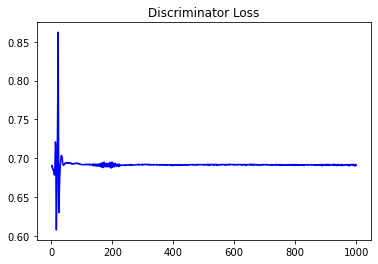

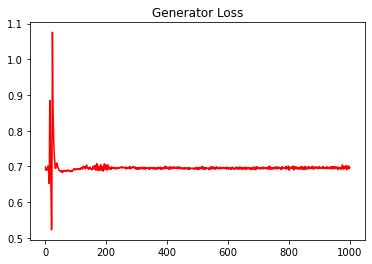

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2905379079304029


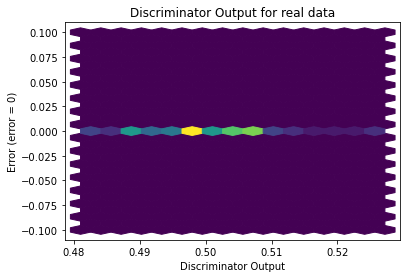

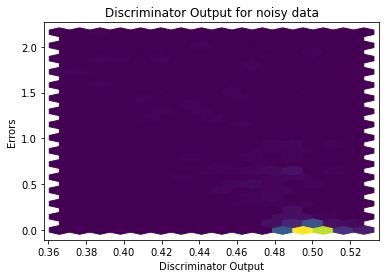

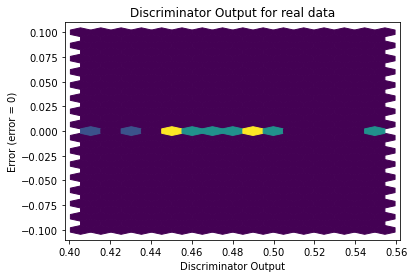

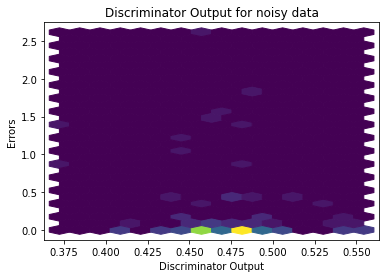

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


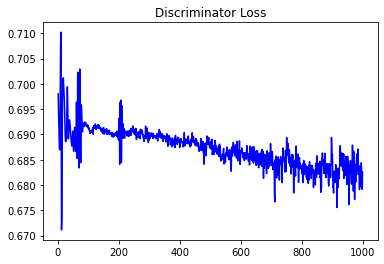

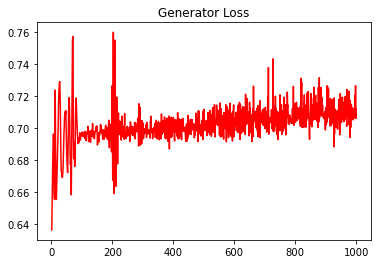

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3732275834182992


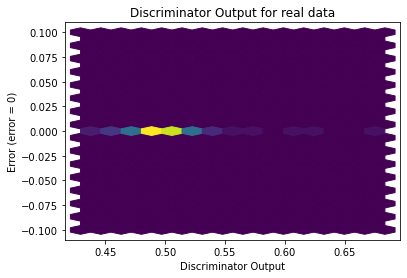

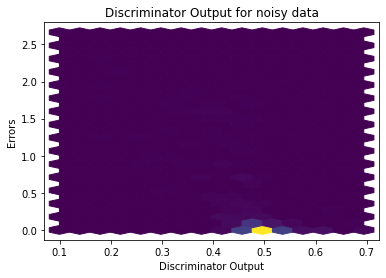

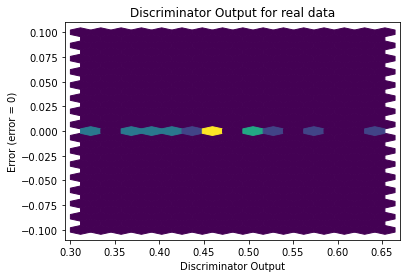

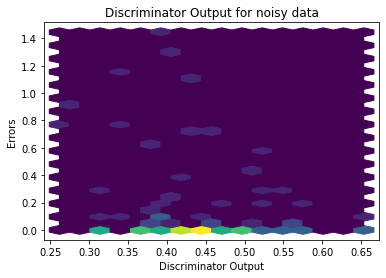

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4878]], requires_grad=True)
